In [43]:
train_root = "Breast Illness (train test split)/train"
test_root = "Breast Illness (train test split)/test"


In [44]:
batch_size = 2

In [45]:
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size)
test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size, shuffle= False)


Found 1103 images belonging to 3 classes.
Found 318 images belonging to 3 classes.


3


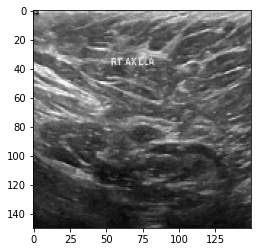

In [46]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][1]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

In [47]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 36, 36, 32)       

In [48]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(train_data, batch_size = batch_size, epochs=10)

Epoch 1/10
552/552 [==============================] - 21s 37ms/step - loss: 1.9254 - accuracy: 0.6011
Epoch 2/10
552/552 [==============================] - 22s 40ms/step - loss: 0.7614 - accuracy: 0.6664
Epoch 3/10
552/552 [==============================] - 21s 39ms/step - loss: 0.7201 - accuracy: 0.6691
Epoch 4/10
552/552 [==============================] - 20s 36ms/step - loss: 0.7450 - accuracy: 0.6709
Epoch 5/10
552/552 [==============================] - 20s 36ms/step - loss: 0.6926 - accuracy: 0.6845
Epoch 6/10
552/552 [==============================] - 20s 37ms/step - loss: 0.6730 - accuracy: 0.6890
Epoch 7/10
552/552 [==============================] - 21s 37ms/step - loss: 0.6676 - accuracy: 0.6872
Epoch 8/10
552/552 [==============================] - 26s 46ms/step - loss: 0.6535 - accuracy: 0.6963
Epoch 9/10
552/552 [==============================] - 33s 59ms/step - loss: 0.6281 - accuracy: 0.6981
Epoch 10/10
552/552 [==============================] - 33s 60ms/step - loss: 0.603

In [49]:
score = model.evaluate(train_data)
print(score)
score = model.evaluate(test_data)
print(score)

552/552 [==============================] - 11s 19ms/step - loss: 0.4869 - accuracy: 0.7688
[0.48692432045936584, 0.768812358379364]
159/159 [==============================] - 3s 19ms/step - loss: 0.8485 - accuracy: 0.6950
[0.8484943509101868, 0.694968581199646]


In [50]:
# pred = model.predict_classes(test_data)
predict=model.predict(test_data) 
import numpy as np
classes=np.argmax(predict,axis=1)
classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0,

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm = confusion_matrix(test_data.classes, classes)

In [53]:
import seaborn as sns

<AxesSubplot:>

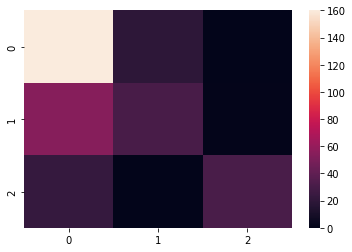

In [54]:
sns.heatmap(cm)

In [55]:
print((cm[0,0]+cm[1,1]+cm[2,2])/sum(sum(cm)))

0.6949685534591195
